# PM10 2013-2015

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

# fromFileName = "BE_5_2013-2015_timeseries"  # TODO: 5: PM10, 7: O3
# fromFileName = "BE_7_2013-2015_timeseries"
fromFileName = "BE_5_2013-2015_aggregated_timeseries"  # TODO: agreggated: yearly or daily?
df1 = pd.read_csv("../../EAAAData/BE_AQeReporting_2013-2015/{}.csv".format(fromFileName), sep='\t', lineterminator='\r')
toFileName = "ALL_BE_51vars_PM10_PM10-1_20130101To20151231"

# Thin ts columns
# df1 = df1[["AirQualityStationEoICode", "AirPollutionLevel", "DatetimeEnd", "Validity", "Verification"]]

# TODO: make a generic dataframe with 2013-2015

# TODO: for row in ts, if validity & verification = True, store val to the df on datetime

In [2]:
minDate = min(df1['DatetimeEnd'])
maxDate = max(df1['DatetimeEnd']) + timedelta(days=30) # Add 30 days to December 1st
#ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

TypeError: '<' not supported between instances of 'float' and 'str'

In [13]:
df1.head(10)

,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,SamplingPoint,AirPollutant,AirPollutantCode,DataAggregationProcess,AirPollutionLevel,UnitOfAirPollutionLevel,DataCapture,DataCoverage,TimeCoverage,DatetimeBegin,DatetimeEnd,Validity,Verification
0,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,7.600000,µg/m3,100.0,100.000000,100.000000,2015-11-22 00:00:00,2015-11-23 00:00:00,1.0,1.0
1,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,7.666667,µg/m3,100.0,100.000000,100.000000,2013-01-29 00:00:00,2013-01-30 00:00:00,1.0,1.0
2,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.020833,µg/m3,100.0,100.000000,100.000000,2014-08-26 00:00:00,2014-08-27 00:00:00,1.0,1.0
3,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.083333,µg/m3,100.0,100.000000,100.000000,2014-02-08 00:00:00,2014-02-09 00:00:00,1.0,1.0
4,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.125000,µg/m3,100.0,100.000000,100.000000,2013-11-09 00:00:00,2013-11-10 00:00:00,1.0,1.0
5,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.187500,µg/m3,100.0,100.000000,100.000000,2013-12-24 00:00:00,2013-12-25 00:00:00,1.0,1.0
6,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.245833,µg/m3,100.0,100.000000,100.000000,2015-08-17 00:00:00,2015-08-18 00:00:00,1.0,1.0
7,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.354167,µg/m3,100.0,100.000000,100.000000,2014-01-16 00:00:00,2014-01-17 00:00:00,1.0,1.0
8,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.437500,µg/m3,100.0,100.000000,100.000000,2013-11-03 00:00:00,2013-11-04 00:00:00,1.0,1.0
9,\nBE,BE.CELINE-IRCEL.AQ,NET-Flanders,STA-BELAB02,BELAB02,SPO-BELAB02_00005_100,PM10,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,P1D,8.590909,µg/m3,100.0,91.666667,91.666667,2014-10-07 00:00:00,2014-10-08 00:00:00,1.0,1.0


# PM10 and Weather data gathering (All BE stations - BE: 79)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8) for the stations in Belgium: "BExxxxx0001xxx"

In [1]:
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta
from numpy import genfromtxt

dirpath = "AirBase_BE_v8/PM10Belgium"
fnames = listdir(dirpath)  # Read all files in directory
stationLabels = ['PM10_'] * len(fnames)  # Suffix for Ozone label
for i in range(len(fnames)):
    stationLabels[i] += fnames[i][:7]  # Add the first area code name
columnLabels = ['PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4',  # Attach all the ECMWF weather labels
                 'SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH',
                 'TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T',
                 'RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR']
columnLabels = stationLabels + columnLabels  # Join lists
for i in range(len(fnames)):
    columnLabels.append(stationLabels[i] + "-1")  # Append the lag-1 day values

In [12]:
for stationLabel in stationLabels:
    if stationLabel.startswith("PM10_BETN"):
        print(stationLabel)

PM10_BETN043
PM10_BETN045
PM10_BETN052
PM10_BETN054
PM10_BETN060
PM10_BETN063
PM10_BETN066
PM10_BETN067
PM10_BETN070
PM10_BETN073
PM10_BETN085
PM10_BETN093
PM10_BETN100
PM10_BETN113
PM10_BETN121
PM10_BETN132


In [2]:
# 1 loop to instantiate minDate & maxDate
for i in range(0, 1):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))
    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])
    currentMinDate = min(df1['month'])
    currentMaxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st   
minDate = currentMinDate
maxDate = currentMaxDate

# Now, do search all files for minDate, MaxDate
for i in range(0, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])

    currentMinDate = min(df1['month'])
    currentMaxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
    
    if currentMinDate < minDate:
        minDate = currentMinDate
    if currentMaxDate > maxDate:
        maxDate = currentMaxDate       

print ("Min date: {}, Max Date: {}".format(minDate, maxDate))
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=columnLabels)

Min date: 1995-01-01 00:00:00, Max Date: 2012-12-31 00:00:00


In [3]:
for i in range(0, len(fnames)):
    fname = fnames[i]
    dfColumn = stationLabels[i]
    columnNames = ['month']
    for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
        columnNames.append(str(i))
        columnNames.append('validity{}'.format(i))

    df1 = pd.read_csv(dirpath + "/" + fname, sep='\t', names=columnNames, lineterminator='\n')
    df1['month'] = pd.to_datetime(df1['month'])

    minDate = min(df1['month'])
    maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st

    for row in df1.itertuples(index=True, name='df1'): # Foreach month
        date = row[1]
        for columnIndex in range(1, df1.shape[1]): # Foreach day
            if columnIndex % 2 == 0: # Even column
                if row[columnIndex + 1] == 1: # If sensor reading valid
                    currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day
                    try:
                        ts.at[currentDate, dfColumn] = row[columnIndex] # Set value to time-series
                    except AttributeError as error:
                        print("fname: ", fname)
                        print("Error: ", error)
                        break

columnLabels               

['PM10_BE0312A',
 'PM10_BEGRT01',
 'PM10_BELAB01',
 'PM10_BELAB02',
 'PM10_BELAL01',
 'PM10_BELAL02',
 'PM10_BELAL05',
 'PM10_BELGK06',
 'PM10_BELGK09',
 'PM10_BELHB23',
 'PM10_BELHR01',
 'PM10_BELKO01',
 'PM10_BELML01',
 'PM10_BELMN01',
 'PM10_BELOB01',
 'PM10_BELOB02',
 'PM10_BELRL01',
 'PM10_BELSA04',
 'PM10_BELSZ02',
 'PM10_BELTR01',
 'PM10_BELWZ01',
 'PM10_BELZD01',
 'PM10_BETAND3',
 'PM10_BETB011',
 'PM10_BETH201',
 'PM10_BETM204',
 'PM10_BETM705',
 'PM10_BETM802',
 'PM10_BETMEU1',
 'PM10_BETN043',
 'PM10_BETN045',
 'PM10_BETN052',
 'PM10_BETN054',
 'PM10_BETN060',
 'PM10_BETN063',
 'PM10_BETN066',
 'PM10_BETN067',
 'PM10_BETN070',
 'PM10_BETN073',
 'PM10_BETN085',
 'PM10_BETN093',
 'PM10_BETN100',
 'PM10_BETN113',
 'PM10_BETN121',
 'PM10_BETN132',
 'PM10_BETR001',
 'PM10_BETR012',
 'PM10_BETR020',
 'PM10_BETR201',
 'PM10_BETR221',
 'PM10_BETR222',
 'PM10_BETR223',
 'PM10_BETR240',
 'PM10_BETR501',
 'PM10_BETR502',
 'PM10_BETR510',
 'PM10_BETR511',
 'PM10_BETR512',
 'PM10_BETR701

In [4]:
print("Station count: ", len(fnames))

Station count:  73


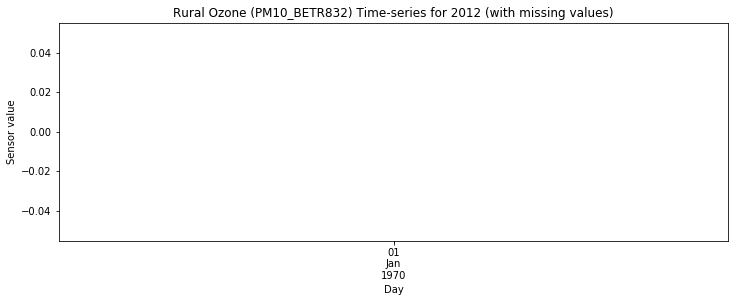

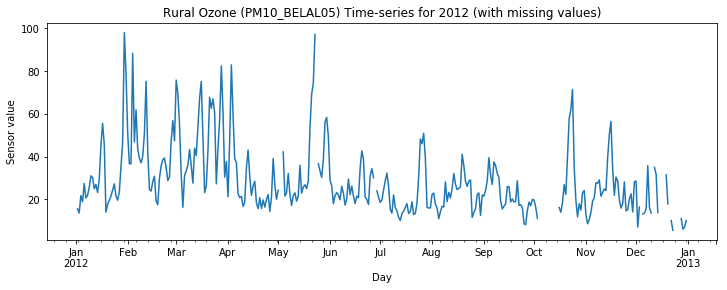

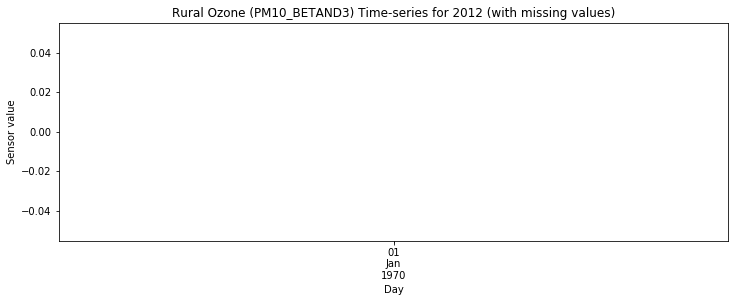

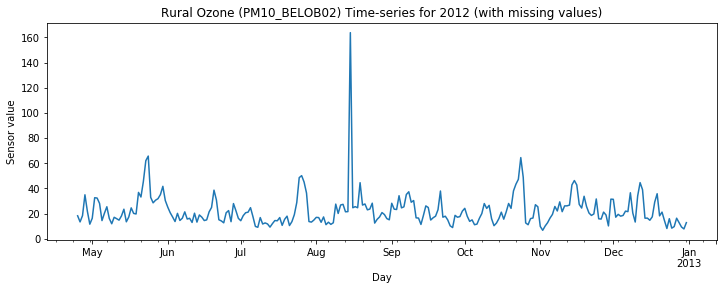

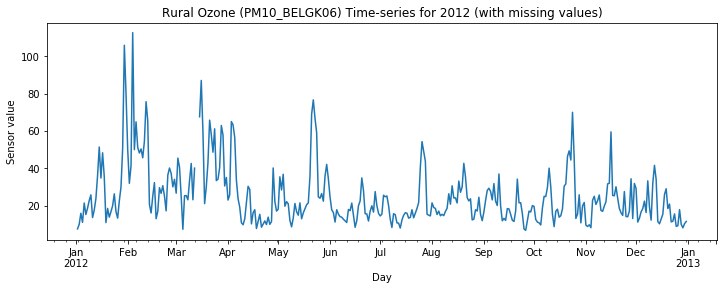

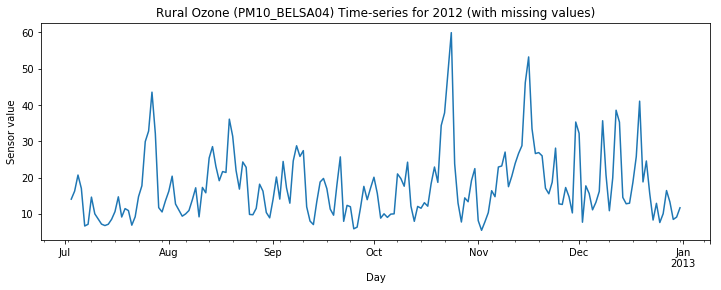

In [5]:
# Test plot stations
stationsToCheck = ['PM10_BETR832', 'PM10_BELAL05', 'PM10_BETAND3', 'PM10_BELOB02', 'PM10_BELGK06','PM10_BELSA04']
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural Ozone ({}) Time-series for 2012 (with missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

### On missing values get the reading from the closest station

Get station lon/lat coordinates:

In [6]:
# Get station coordinates
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()

stationLonLat = {}
# stationLonLat["BELOB02"] = (3.376, 50.914)  # Manually add BELOB02 40OB02 - WIELSBEKE (lon/lat was missing)
# stationLonLat["BELSA04"] = (4.4042624, 51.3135154)
# stationLonLat["BETR834"] = (4.3799862, 51.0916466)

for child in root:    
    for child1 in child:          
        if child1.tag == "station":           
            if child1.attrib['Id'].startswith("BE"):  # TODO: 
                for child2 in child1:
                    if child2.tag == "station_info":
                        lon = 0.0
                        lat = 0.0
                        for child3 in child2:         
                            if child3.tag == "station_latitude_decimal_degrees":
                                lat = child3.text
                            if child3.tag == "station_longitude_decimal_degrees":
                                lon = child3.text                        
                        stationLonLat[child1.attrib['Id'][:7]] = (float(lon), float(lat))

# Remove stations without max8h file on disk
stationsToDelete = []
for stationKey in stationLonLat.keys():
    if not "PM10_" + stationKey in stationLabels:
        stationsToDelete.append(stationKey)

for stationToDelete in stationsToDelete:
    del stationLonLat[stationToDelete]
        

Store an ordered dictionary for the next closest station of the current:

In [7]:
import math
from collections import OrderedDict

def getDistanceDegrees(station1, station2):
    return math.sqrt((stationLonLat[station1][0] -stationLonLat[station2][0])**2 + (stationLonLat[station1][1] -stationLonLat[station2][1])**2)

distanceStationToStation = {}

for station1 in stationLonLat.keys():
    distancesToStation = {}
    for station2 in stationLonLat.keys():
        if station1 != station2:
            distancesToStation[station2] = getDistanceDegrees(station1, station2) 
    distanceStationToStation[station1] = OrderedDict(sorted(distancesToStation.items(), key=lambda t: t[1]))
    

In [8]:
distanceStationToStation["BELOB02"].keys()

odict_keys(['BELOB01', 'BETN052', 'BELKO01', 'BETM705', 'BE0312A', 'BELRL01', 'BELMN01', 'BETN060', 'BETR701', 'BETR731', 'BETR710', 'BETR740', 'BETR750', 'BELHR01', 'BETN070', 'BELTR01', 'BETB011', 'BETAND3', 'BELAL02', 'BETR001', 'BELAL05', 'BETR012', 'BETR832', 'BELZD01', 'BELHB23', 'BETR815', 'BETN043', 'BETMEU1', 'BELAB01', 'BETR834', 'BELAB02', 'BETWOL1', 'BETR831', 'BELAL01', 'BETR020', 'BETR833', 'BELML01', 'BETR801', 'BETR802', 'BETR841', 'BETM802', 'BELSA04', 'BELSZ02', 'BETR512', 'BETR811', 'BETR511', 'BETR502', 'BETR501', 'BETR510', 'BETN063', 'BETN100', 'BETN073', 'BEGRT01', 'BETN054', 'BELWZ01', 'BETN093', 'BETN045', 'BETR240', 'BELGK06', 'BETN121', 'BELGK09', 'BETR223', 'BETH201', 'BETR222', 'BETR201', 'BETM204', 'BETR221', 'BETN113', 'BETN132', 'BETN067', 'BETN066', 'BETN085'])

Check if distances of a specific station are indeed ordered:

In [9]:
distanceStationToStation["BETN073"].keys()

odict_keys(['BETN054', 'BETN093', 'BETN063', 'BETR240', 'BETR510', 'BETR502', 'BETR223', 'BETR501', 'BETN100', 'BETH201', 'BETR511', 'BETN045', 'BETR222', 'BETR512', 'BETR201', 'BELSZ02', 'BETM204', 'BELGK06', 'BETR221', 'BETN121', 'BELGK09', 'BETWOL1', 'BETR012', 'BETR020', 'BETMEU1', 'BETN043', 'BETR841', 'BEGRT01', 'BELML01', 'BETR001', 'BETAND3', 'BELWZ01', 'BETN113', 'BETB011', 'BETR834', 'BETR832', 'BETR811', 'BETR801', 'BETR802', 'BELHB23', 'BETM802', 'BELAL01', 'BETR815', 'BELZD01', 'BELHR01', 'BELSA04', 'BETN067', 'BETN132', 'BELAB01', 'BETN066', 'BELTR01', 'BETN085', 'BETR833', 'BELAL05', 'BETN070', 'BETR831', 'BELAB02', 'BELAL02', 'BETR710', 'BETR740', 'BETR750', 'BETR701', 'BETR731', 'BETN060', 'BELOB02', 'BETN052', 'BELOB01', 'BELKO01', 'BETM705', 'BE0312A', 'BELMN01', 'BELRL01'])

In [10]:
distanceStationToStation["BETN073"]

OrderedDict([('BETN054', 0.2384026903392695),
             ('BETN093', 0.33611091541929794),
             ('BETN063', 0.3546874220408722),
             ('BETR240', 0.41693307642954036),
             ('BETR510', 0.47517768309233427),
             ('BETR502', 0.5348304931041228),
             ('BETR223', 0.5409818440474693),
             ('BETR501', 0.5443068534365513),
             ('BETN100', 0.5662376088401381),
             ('BETH201', 0.5722400361614004),
             ('BETR511', 0.5774254005098836),
             ('BETN045', 0.5790598361352652),
             ('BETR222', 0.5922212472387324),
             ('BETR512', 0.6000607293432878),
             ('BETR201', 0.6001511919449966),
             ('BELSZ02', 0.6285940146620895),
             ('BETM204', 0.6322119994883059),
             ('BELGK06', 0.6428523938300333),
             ('BETR221', 0.6580828429559623),
             ('BETN121', 0.6611531502488646),
             ('BELGK09', 0.6640067350870791),
             ('BETWOL1', 0.6647

In [11]:
ts2 = ts.copy()
for dataRow in ts2.itertuples(index=True, name='Pandas'):
    date = dataRow[0]
    for stationLabel in stationLabels:
        if np.isnan(ts2.at[date, stationLabel]):  # If no value at station
            for closestStationLabel in distanceStationToStation[stationLabel[-7:]].keys():
                closestValue = ts.at[date, "PM10_" + closestStationLabel]
                if not np.isnan(closestValue):
                    ts2.at[date, stationLabel] = closestValue
                    break  # Exit the loop    
ts = ts2                    

In [12]:
ts2.head(365)["PM10_BELOB02"].head(20)

1995-01-01    19.0
1995-01-02    24.0
1995-01-03    98.0
1995-01-04    42.0
1995-01-05    45.0
1995-01-06    81.0
1995-01-07    93.0
1995-01-08    27.0
1995-01-09    56.0
1995-01-10    30.0
1995-01-11    27.0
1995-01-12    38.0
1995-01-13    69.0
1995-01-14    97.0
1995-01-15    49.0
1995-01-16    24.0
1995-01-17    26.0
1995-01-18    26.0
1995-01-19    19.0
1995-01-20    43.0
Freq: D, Name: PM10_BELOB02, dtype: float64

Check if missing values indeed filled:

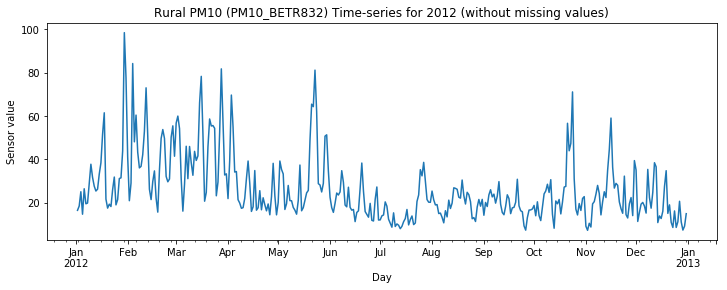

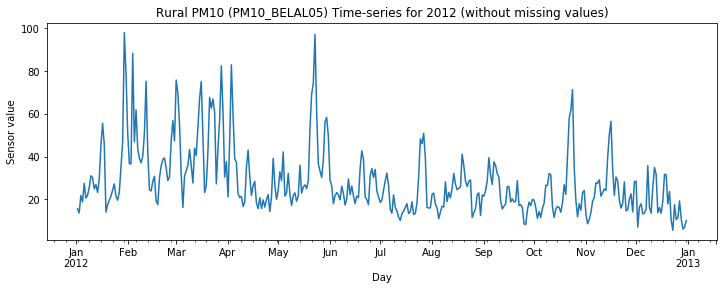

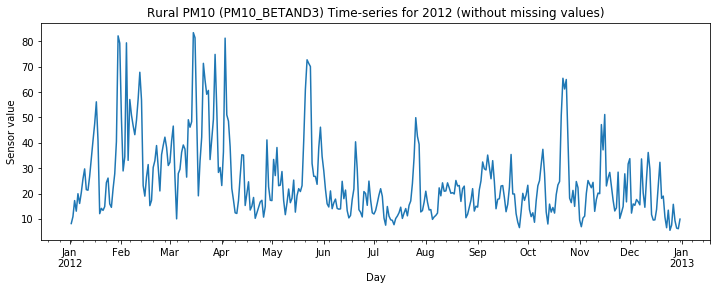

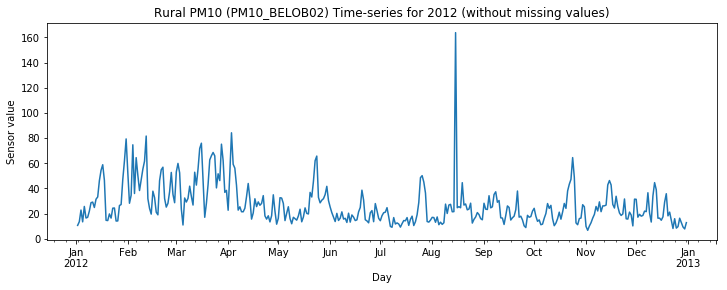

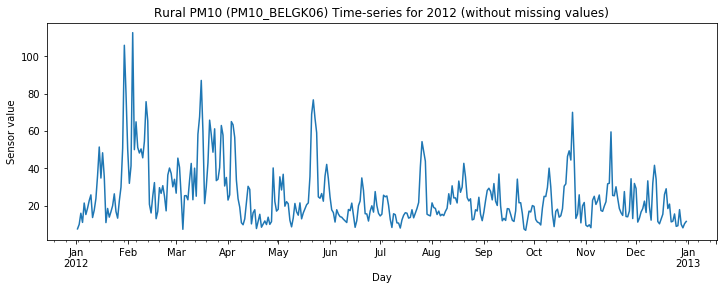

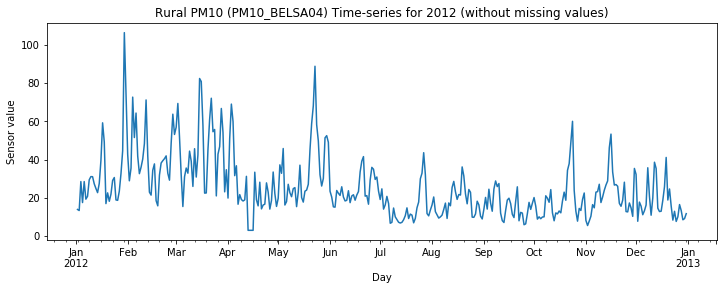

In [13]:
# Test plot stations
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);

Adding weather data into the dataframe:

In [14]:
# Read geo-weather data
weatherData = genfromtxt('ECMWF\BETN073_51vars_19900101To20171231.csv', delimiter=',')

columns = len(weatherData[0])
row = -1
column = -1
addedColumns = len(stationLabels)

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    row += 1       
    if row < weatherData.shape[0] and column < weatherData.shape[1]:
        for column in range(columns):  
            ts.at[date, columnLabels[column + addedColumns]] = weatherData[row][column] # Set value to time-series        

Add 1-day lags:

In [15]:
# columns = len(weatherData[0])
row = -1
column = -1
# addedColumns = len(stationLabels)
PM10lags = [0] * addedColumns

# Attach weather data
for dataRow in ts.itertuples(index=True, name='Pandas'):    
    date = dataRow[0]
    for i in range(len(stationLabels)):
        ts.at[date, stationLabels[i] + '-1'] = PM10lags[i] # Get lag value
        PM10lags[i] = ts.at[date, stationLabels[i]]  # Set next lag value

In [16]:
ts.head(6000).tail(5)["PM10_BETN073"]

2011-06-01    15.071
2011-06-02    13.008
2011-06-03    18.758
2011-06-04    21.404
2011-06-05    21.862
Freq: D, Name: PM10_BETN073, dtype: float64

In [17]:
ts.head(6000).tail(5)["PM10_BETN132"]

2011-06-01    12.571
2011-06-02     6.550
2011-06-03     8.738
2011-06-04    14.050
2011-06-05    15.300
Freq: D, Name: PM10_BETN132, dtype: float64

In [18]:
ts.head(6000).tail(5)["PARCS"]

2011-06-01    2990379.0
2011-06-02    2987812.0
2011-06-03    2989369.0
2011-06-04    2993987.0
2011-06-05    3002104.0
Freq: D, Name: PARCS, dtype: float64

In [19]:
ts.head(6000).tail(5)["FSR"]

2011-06-01    0.146394
2011-06-02    0.146390
2011-06-03    0.146392
2011-06-04    0.146391
2011-06-05    0.146393
Freq: D, Name: FSR, dtype: float64

Time-series plot of O3, first 365 days (1990, with missing data):

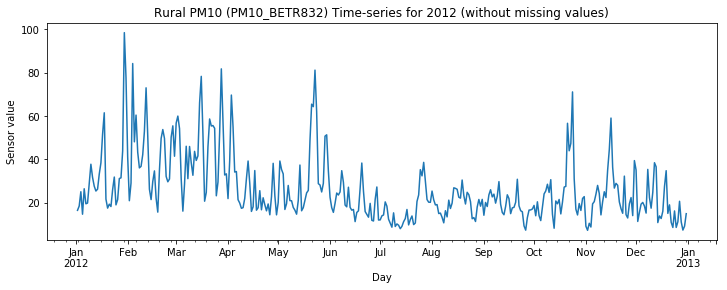

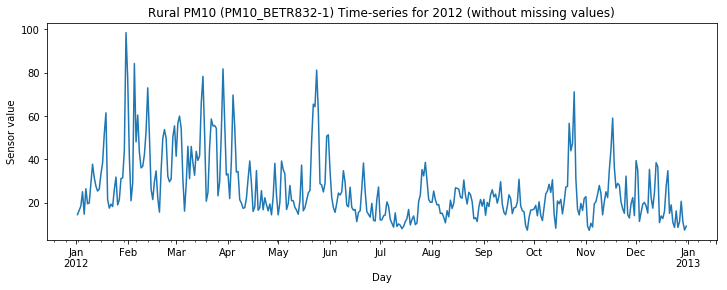

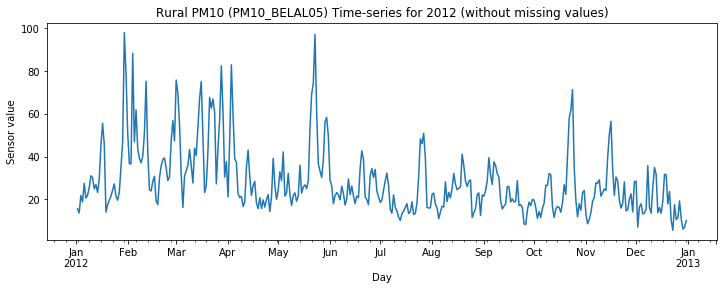

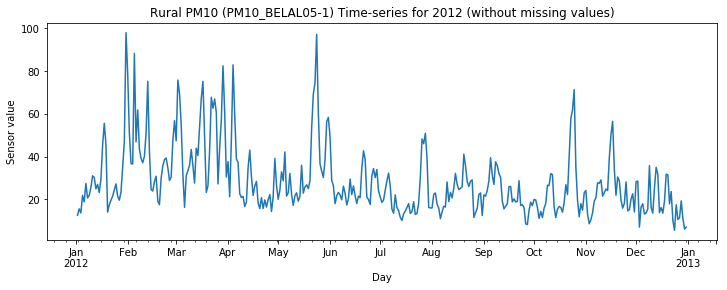

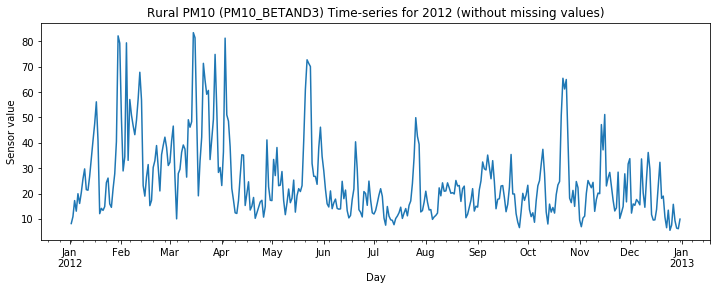

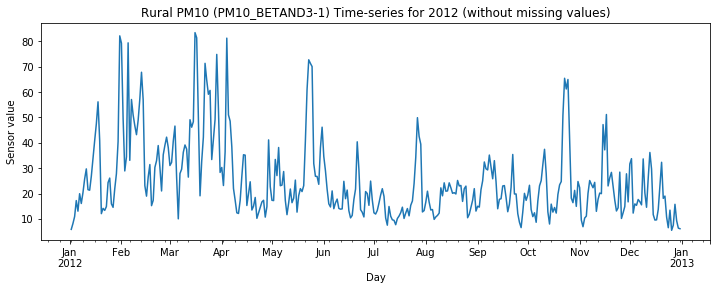

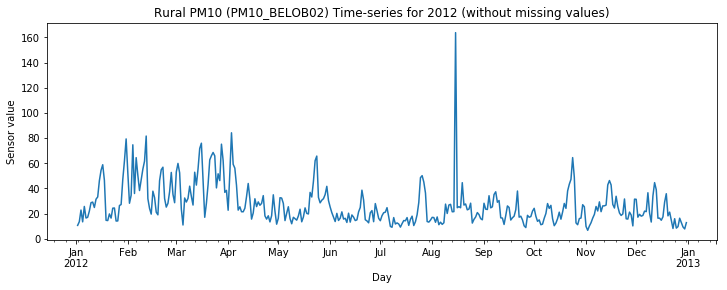

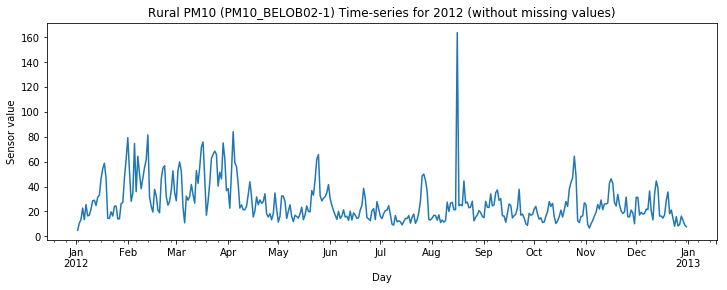

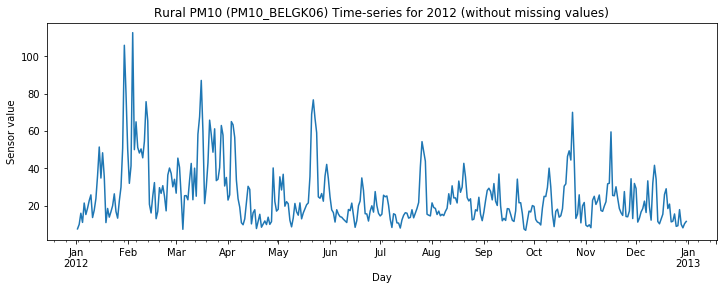

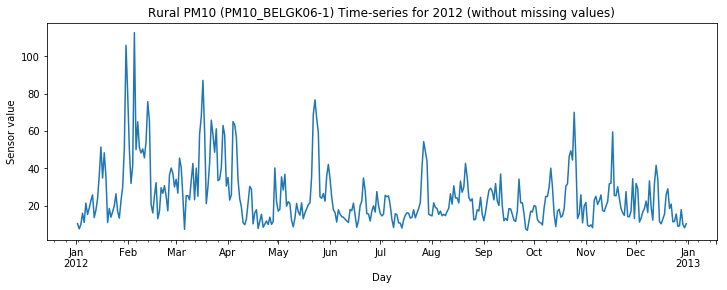

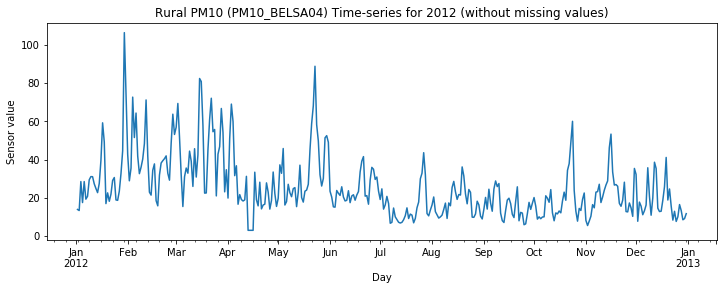

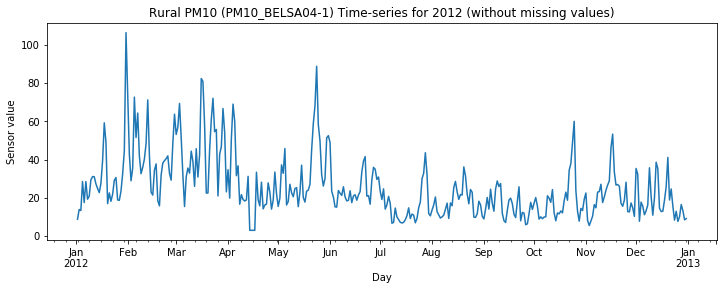

In [20]:
# Test plot stations and lags
for stationToCheck in stationsToCheck:
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheck))
    ax.grid(True)
    ts.tail(365)[stationToCheck].plot(ax = ax);
    
    stationToCheckLag = stationToCheck + "-1"
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.set_ylabel('Sensor value')
    ax.set_xlabel('Day')
    ax.set_title('Rural PM10 ({}) Time-series for 2012 (without missing values)'.format(stationToCheckLag))
    ax.grid(True)
    ts.tail(365)[stationToCheckLag].plot(ax = ax);

Plot other time-series variables (Temperature 2m):

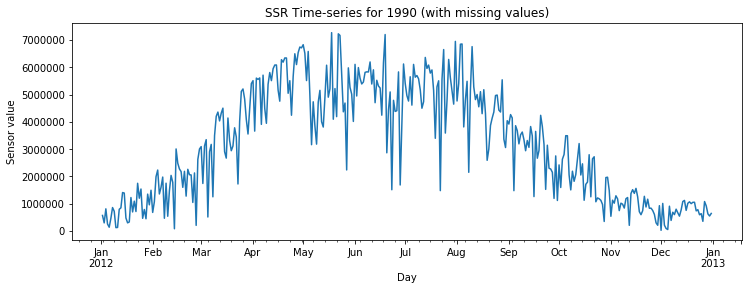

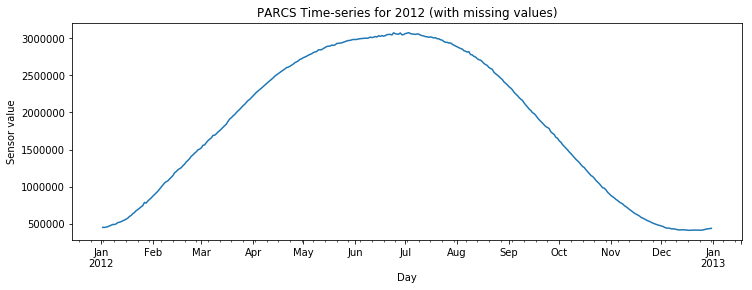

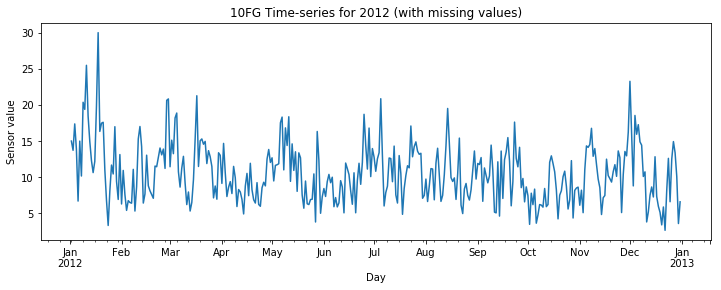

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('SSR Time-series for 1990 (with missing values)')
ax.grid(True)
# ts.tail(365)['2T'].plot(ax = ax);
# ['O3', '10FG', 'BLH', '10U', '2T', 'SSR', 'SUND', 'O3-1']
#['O3','PARCS','CI','RSN','SST','ISTL1','ISTL2','ISTL3','ISTL4','SWVL1','SWVL2','SWVL3','SWVL4','10FG','LSPF','CAPE','SP','W','STL1','SD','LSP','CP','SF','SSHF','MSL','BLH','TCC','10U','V','2T','2D','SSRD','STL2','STRD','SSR','TTR','E','STL3','LCC','MCC','HCC','SRC','MX2T','MN2T','RO','TCO3','TP','IEWS','SKT','STL4','FAL','FSR','O3-1']
ts.tail(365)['SSR'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('PARCS Time-series for 2012 (with missing values)')
ax.grid(True)
ts.tail(365)['PARCS'].plot(ax = ax);

fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('10FG Time-series for 2012 (with missing values)')
ax.grid(True)
ts.tail(365)['10FG'].plot(ax = ax);

Lag variable (-1 day):

In [22]:
ts.tail(10)[stationLabels[0]]  

2012-12-22    13.224
2012-12-23    11.252
2012-12-24    18.386
2012-12-25    10.385
2012-12-26    15.860
2012-12-27    26.150
2012-12-28    11.595
2012-12-29     9.700
2012-12-30    11.910
2012-12-31    16.081
Freq: D, Name: PM10_BE0312A, dtype: float64

In [23]:
ts.tail(10)[stationLabels[0] + '-1']

2012-12-22    23.529
2012-12-23    13.224
2012-12-24    11.252
2012-12-25    18.386
2012-12-26    10.385
2012-12-27    15.860
2012-12-28    26.150
2012-12-29    11.595
2012-12-30     9.700
2012-12-31    11.910
Freq: D, Name: PM10_BE0312A-1, dtype: float64

In [24]:
ts.tail(10)[stationLabels[1]]

2012-12-22    10.723
2012-12-23     8.618
2012-12-24    13.938
2012-12-25     7.700
2012-12-26     9.073
2012-12-27    21.032
2012-12-28     8.490
2012-12-29     6.091
2012-12-30     9.409
2012-12-31    13.341
Freq: D, Name: PM10_BEGRT01, dtype: float64

In [25]:
ts.tail(10)[stationLabels[1] + '-1']

2012-12-22    19.218
2012-12-23    10.723
2012-12-24     8.618
2012-12-25    13.938
2012-12-26     7.700
2012-12-27     9.073
2012-12-28    21.032
2012-12-29     8.490
2012-12-30     6.091
2012-12-31     9.409
Freq: D, Name: PM10_BEGRT01-1, dtype: float64

In [26]:
ts.tail(10)[stationLabels[2]]

2012-12-22    16.250
2012-12-23    10.771
2012-12-24    17.458
2012-12-25    10.542
2012-12-26    11.438
2012-12-27    19.250
2012-12-28    13.479
2012-12-29    11.104
2012-12-30    11.896
2012-12-31    15.354
Freq: D, Name: PM10_BELAB01, dtype: float64

In [27]:
ts.tail(10)[stationLabels[2] + '-1']

2012-12-22    23.667
2012-12-23    16.250
2012-12-24    10.771
2012-12-25    17.458
2012-12-26    10.542
2012-12-27    11.438
2012-12-28    19.250
2012-12-29    13.479
2012-12-30    11.104
2012-12-31    11.896
Freq: D, Name: PM10_BELAB01-1, dtype: float64

In [28]:
ts.tail(10)[stationLabels[3]]

2012-12-22    14.438
2012-12-23    11.167
2012-12-24    15.583
2012-12-25     9.479
2012-12-26    11.542
2012-12-27    19.479
2012-12-28    12.667
2012-12-29     9.854
2012-12-30    11.021
2012-12-31    13.354
Freq: D, Name: PM10_BELAB02, dtype: float64

In [29]:
ts.tail(10)[stationLabels[3] + '-1']

2012-12-22    22.583
2012-12-23    14.438
2012-12-24    11.167
2012-12-25    15.583
2012-12-26     9.479
2012-12-27    11.542
2012-12-28    19.479
2012-12-29    12.667
2012-12-30     9.854
2012-12-31    11.021
Freq: D, Name: PM10_BELAB02-1, dtype: float64

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

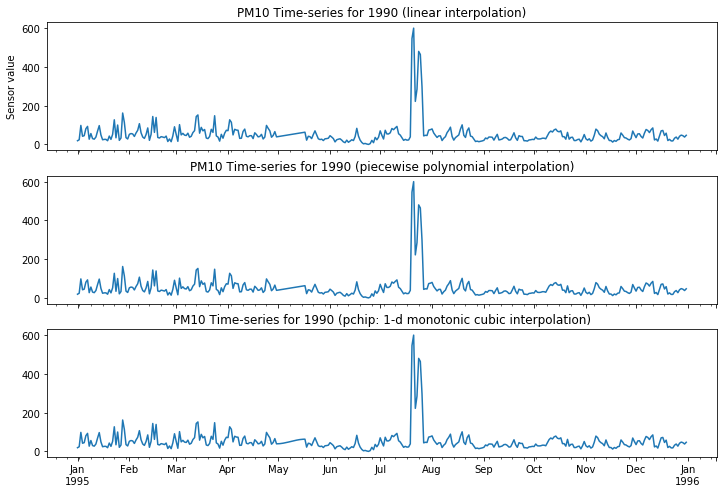

In [30]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('PM10 Time-series for 1990 (linear interpolation)')
ax[1].set_title('PM10 Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('PM10 Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ts2a.head(365)['PM10_BETN054'].plot(ax = ax[0]);
ts2b.head(365)['PM10_BETN054'].plot(ax = ax[1]);
ts2c.head(365)['PM10_BETN054'].plot(ax = ax[2]);

In [76]:
ts_interpolated = ts.interpolate(method='linear',limit=8,limit_direction='both')  # 8 days
ts_interpolated.head(10)['PM10_BETN066']

1995-01-01    19.0
1995-01-02    24.0
1995-01-03    98.0
1995-01-04    42.0
1995-01-05    45.0
1995-01-06    81.0
1995-01-07    93.0
1995-01-08    27.0
1995-01-09    56.0
1995-01-10    30.0
Freq: D, Name: PM10_BETN066, dtype: float64

In [77]:
ts_interpolated.head(30)['PM10_BETN054-1']

1995-01-01      0.0
1995-01-02     19.0
1995-01-03     24.0
1995-01-04     98.0
1995-01-05     42.0
1995-01-06     45.0
1995-01-07     81.0
1995-01-08     93.0
1995-01-09     27.0
1995-01-10     56.0
1995-01-11     30.0
1995-01-12     27.0
1995-01-13     38.0
1995-01-14     69.0
1995-01-15     97.0
1995-01-16     49.0
1995-01-17     24.0
1995-01-18     26.0
1995-01-19     26.0
1995-01-20     19.0
1995-01-21     43.0
1995-01-22     26.0
1995-01-23     52.0
1995-01-24    127.0
1995-01-25     34.0
1995-01-26    100.0
1995-01-27     21.0
1995-01-28     33.0
1995-01-29    162.0
1995-01-30    114.0
Freq: D, Name: PM10_BETN054-1, dtype: float64

In [78]:
ts_interpolated.head(30)['PM10_BETN054']

1995-01-01     19.0
1995-01-02     24.0
1995-01-03     98.0
1995-01-04     42.0
1995-01-05     45.0
1995-01-06     81.0
1995-01-07     93.0
1995-01-08     27.0
1995-01-09     56.0
1995-01-10     30.0
1995-01-11     27.0
1995-01-12     38.0
1995-01-13     69.0
1995-01-14     97.0
1995-01-15     49.0
1995-01-16     24.0
1995-01-17     26.0
1995-01-18     26.0
1995-01-19     19.0
1995-01-20     43.0
1995-01-21     26.0
1995-01-22     52.0
1995-01-23    127.0
1995-01-24     34.0
1995-01-25    100.0
1995-01-26     21.0
1995-01-27     33.0
1995-01-28    162.0
1995-01-29    114.0
1995-01-30     35.0
Freq: D, Name: PM10_BETN054, dtype: float64

In [79]:
print("Count of NaN values: ", np.isnan(ts_interpolated).any().sum())

Count of NaN values:  0


In [80]:
print("Count of zero values: ", ts_interpolated.size - np.count_nonzero(ts_interpolated))

Count of zero values:  58894


In [81]:
# Store to time-series csv
file_name = "ALL_BE_51vars_PM10_PM10-1_19940101To20121231.csv"
ts_interpolated.to_csv(file_name, sep=',', encoding='utf-8')